Julius Aditya
220711892
Bokeh
Mengklsifikasi Anggur Merah, Concord, dan Thompson

In [24]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
data_dir = r"C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\train_data" 
data = tf.keras.utils.image_dataset_from_directory(data_dir,seed = 123, image_size=(180,180), batch_size=16)

print(data.class_names)

class_names = data.class_names

img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils. image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)


Found 300 files belonging to 3 classes.
['Concord', 'Merah', 'Thompson']
Found 300 files belonging to 3 classes.
Total Images: 10
Train Images: 9
Validation Images: 1


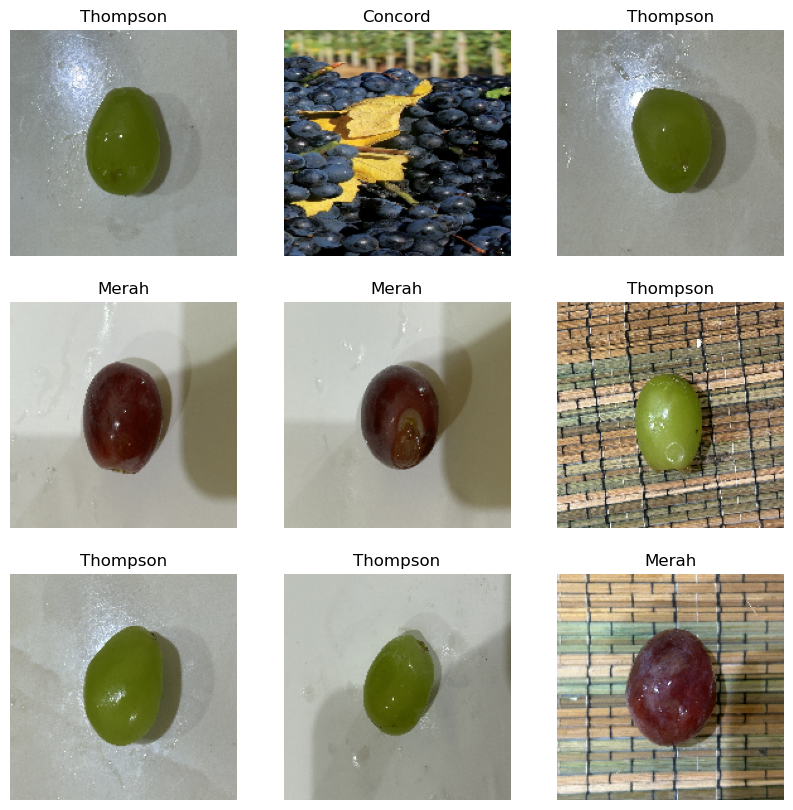

In [25]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [26]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


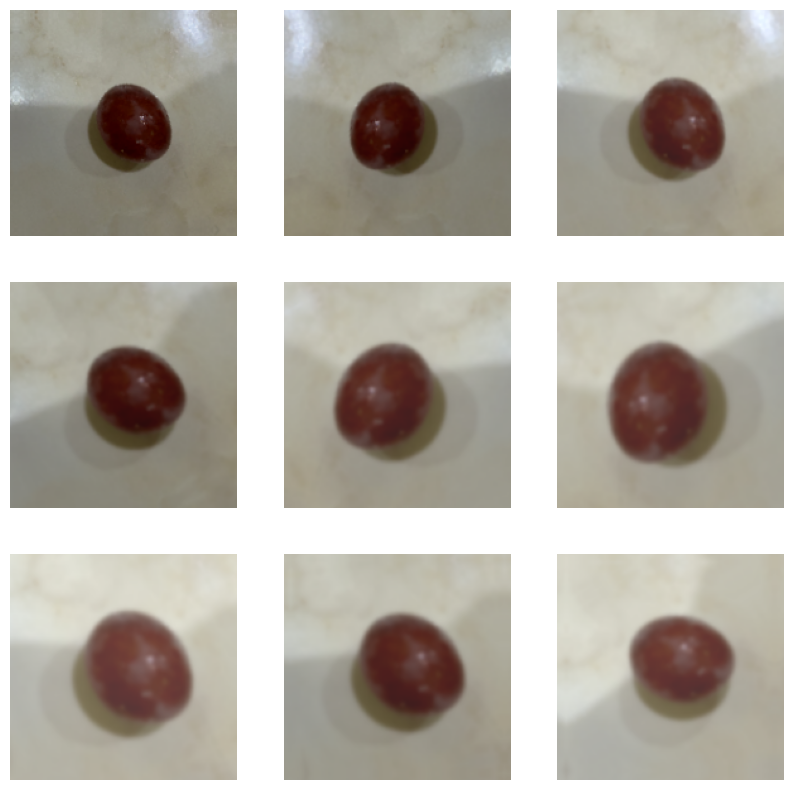

In [27]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape= (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1)
])

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [28]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def alexnet(input_shape, n_classes):
    input = Input(input_shape)
    
    x = Conv2D(96, (11, 11), strides=4, activation='relu', padding='valid')(input)
    x = MaxPool2D((3, 3), strides=2)(x)
    
    x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    x = MaxPool2D((3, 3), strides=2)(x)
    
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((3, 3), strides=2)(x)
    
    x = Flatten()(x)
    
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1000, activation='relu')(x)
    
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    return model

input_shape = (227, 227, 3) 
n_classes = 3 

model = alexnet(input_shape, n_classes)
model.summary()

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)

train_ds = datagen.flow_from_directory(
    r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\train_data', 
    target_size=(227, 227),  
    batch_size=32,
    class_mode='sparse'  
)

val_ds = val_datagen.flow_from_directory(
    r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\train_data',  
    target_size=(227, 227), 
    batch_size=32,
    class_mode='sparse'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    mode='max'
)

history = model.fit(
    train_ds,  
    epochs=30,  
    validation_data=val_ds,  
    callbacks=[early_stopping],  
    verbose=1 
)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 227, 227, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_15 (Conv2D)              │ (None, 55, 55, 96)        │     34,944 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 27, 27, 96)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_16 (Conv2D)              │ (None, 27, 27, 256)       │    614,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 384)       │    885,120 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 384)       │  1,327,488 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 256)       │    884,992 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 4096)              │ 37,752,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_13 (Dense)                │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_14 (Dense)                │ (None, 1000)              │  4,097,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_15 (Dense)                │ (None, 3)                 │      3,003 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 62,381,347 (237.97 MB)

 Trainable params: 62,381,347 (237.97 MB)

 Non-trainable params: 0 (0.00 B)

Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.2957 - loss: 1.2819 - val_accuracy: 0.3333 - val_loss: 1.0748
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.4131 - loss: 0.9865 - val_accuracy: 0.6900 - val_loss: 0.6626
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.6216 - loss: 0.6762 - val_accuracy: 0.7133 - val_loss: 0.5645
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.6399 - loss: 0.7429 - val_accuracy: 0.4267 - val_loss: 1.1534
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.3752 - loss: 1.2006 - val_accuracy: 0.3333 - val_loss: 1.1052
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.3161 - loss: 1.1026 - val_accuracy: 0.5433 - val_loss: 0.9953
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.3993 - loss: 1.1281 - val_accuracy: 0.3333 - val_loss: 1.0984
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━

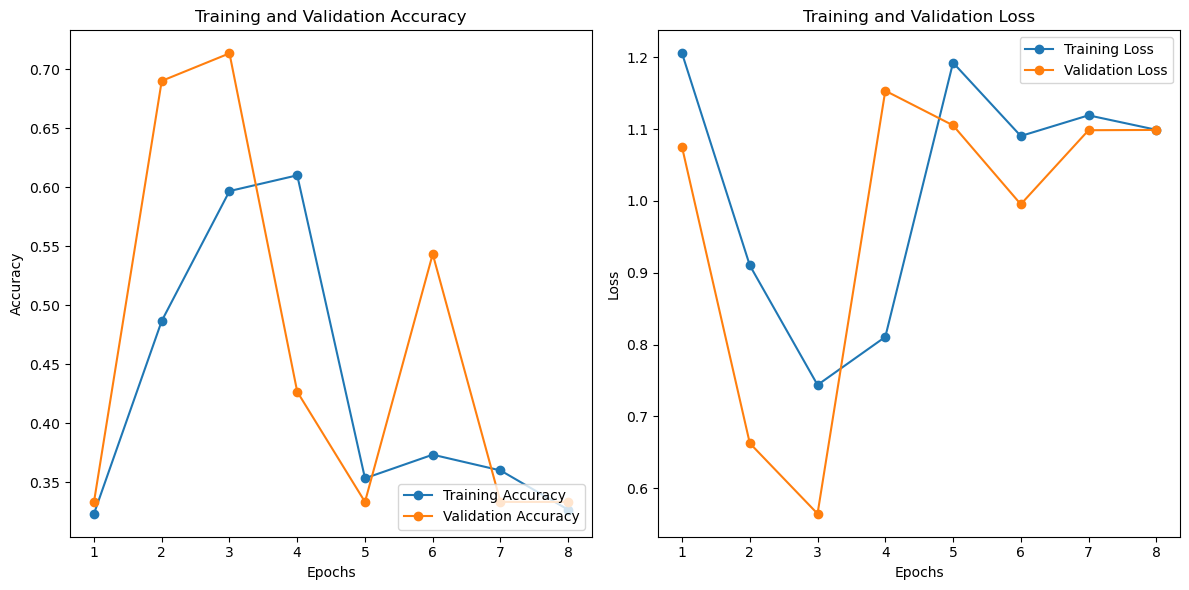

In [29]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [30]:
model.save('alexnet.h5')

c:\Users\LENOVO LEGION\anaconda3\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

model = load_model(r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\alexnet.h5') 
class_names = ['Concord', 'Merah', 'Thompson']

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r'test_data\Merah\Merah_Grape_Original_Data03.JPG', save_path='merah2.jpg')
print(result)


Terjadi kesalahan: Input 0 of layer "functional_11" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(1, 180, 180, 3)


Found 30 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


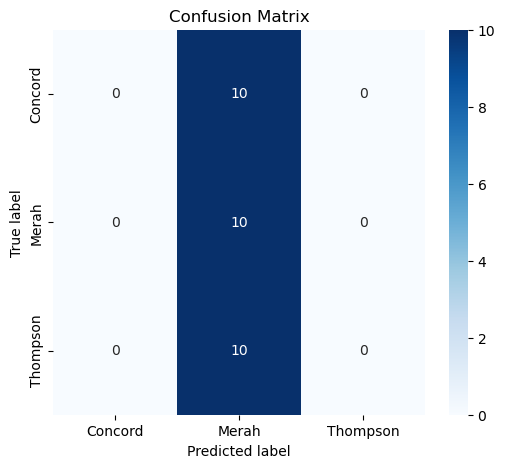

Confusion Matrix:
 [[ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]]
Akurasi:  0.3333333333333333
Presisi:  [       nan 0.33333333        nan]
Recall: [0. 1. 0.]
F1 Score:  [nan 0.5 nan]


In [32]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data', 
    labels='inferred',
    label_mode='categorical',  
    batch_size=32,
    image_size=(227, 227) 
)

model = load_model(r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\alexnet.h5') 

y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Concord", "Merah", "Thompson"], yticklabels=["Concord", "Merah", "Thompson"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi: ", accuracy.numpy())
print("Presisi: ", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score: ", f1_score.numpy())
